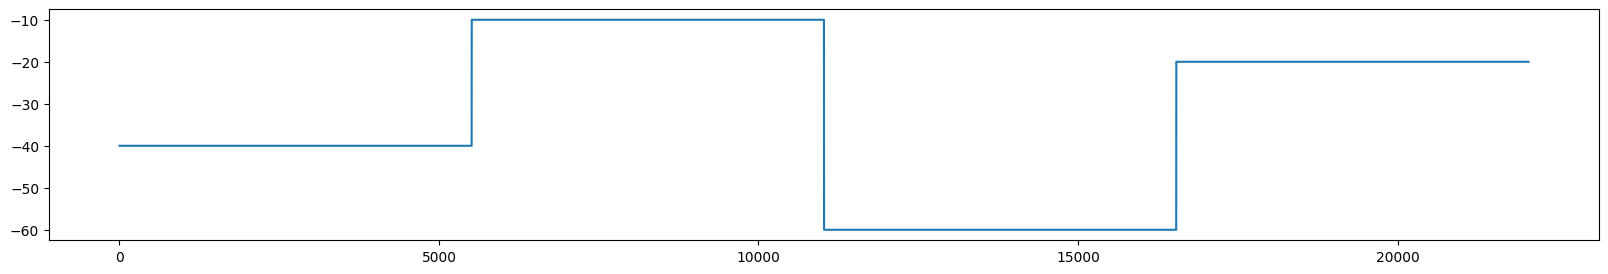

In [2]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_RATE = 44100
FFT_SIZE = 1024
HOP_SIZE = FFT_SIZE / 4
TIME_PER_HOP_MS = 1000 * HOP_SIZE / SAMPLE_RATE

ATTACK_MS = 5
RELEASE_MS = 5
THRESHOLD = -30.0
RATIO = 2.0
KNEE = 10.0

ATT_COEF = np.exp(-1. / (SAMPLE_RATE * ATTACK_MS * 1e-3)) # samples per millisecond
REL_COEF = np.exp(-1. / (SAMPLE_RATE * RELEASE_MS * 1e-3))

buffer = np.zeros(int(SAMPLE_RATE * 0.5))
buffer[:len(buffer)//4] = -40.0
buffer[len(buffer)//4:len(buffer)//2] = -10.0
buffer[len(buffer)//2: ((3 * len(buffer))//4)] = -60.0
buffer[((3 * len(buffer))//4):len(buffer)] = -20.0

plt.figure(figsize=(20,3))
plt.plot(buffer)

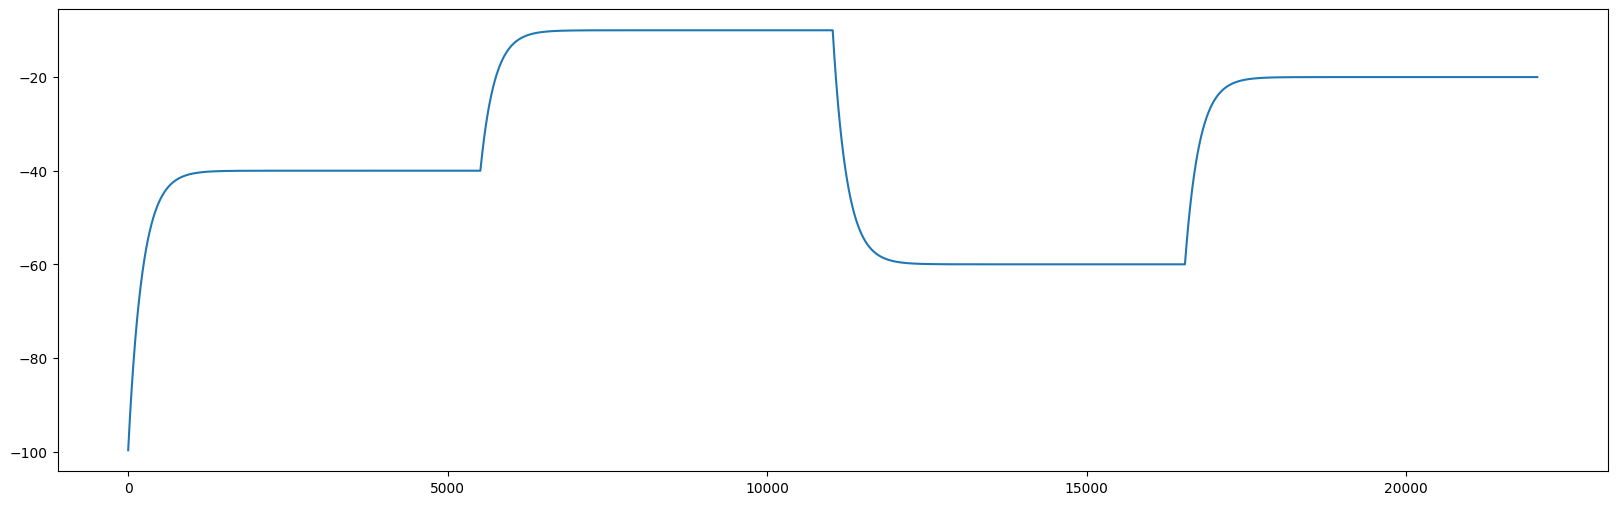

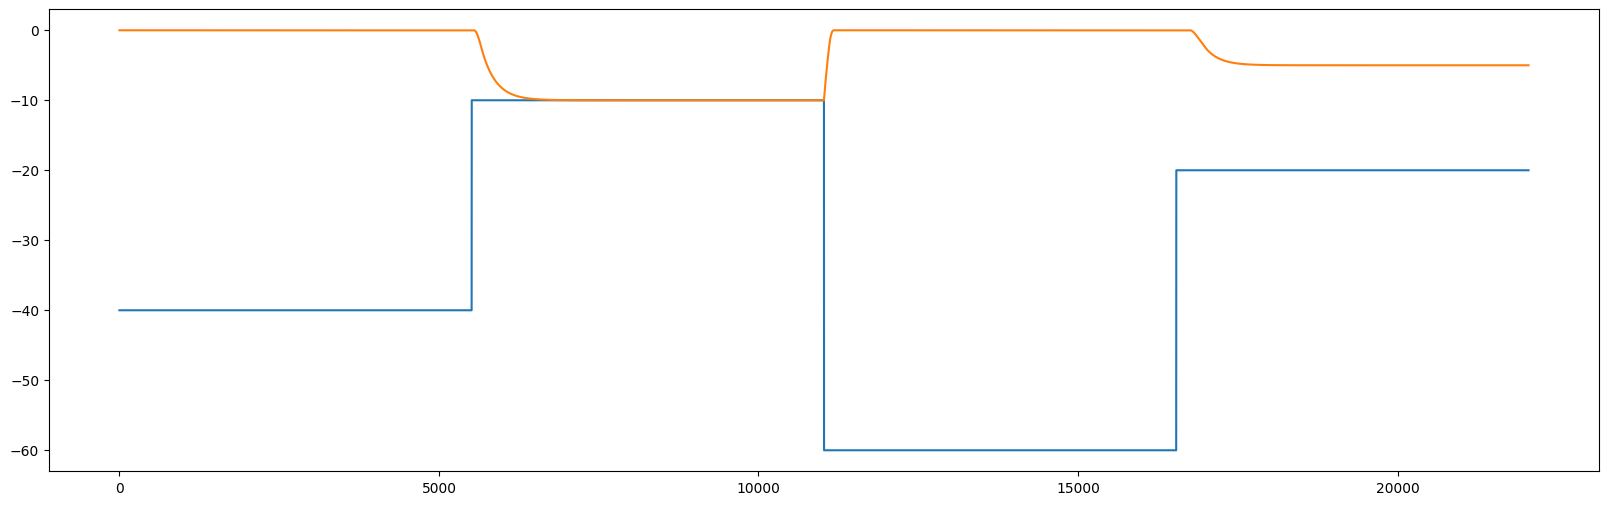

In [3]:
from compressor_class import Compressor
from env_follower_class import EnvelopeFollower

envflw = EnvelopeFollower(att=ATTACK_MS, rel=RELEASE_MS, sr=SAMPLE_RATE)
envflw.process(buffer)
env = envflw.get_envelope()

plt.figure(figsize=(20,6))
plt.plot(env)


comp = Compressor(Th=THRESHOLD, R=RATIO, W=KNEE, ATT=ATTACK_MS, REL=RELEASE_MS, fs=SAMPLE_RATE)

output = comp.apply_compression(buffer)

# plot output agains input
plt.figure(figsize=(20,6))
plt.plot(buffer)
plt.plot(output)
plt.show()



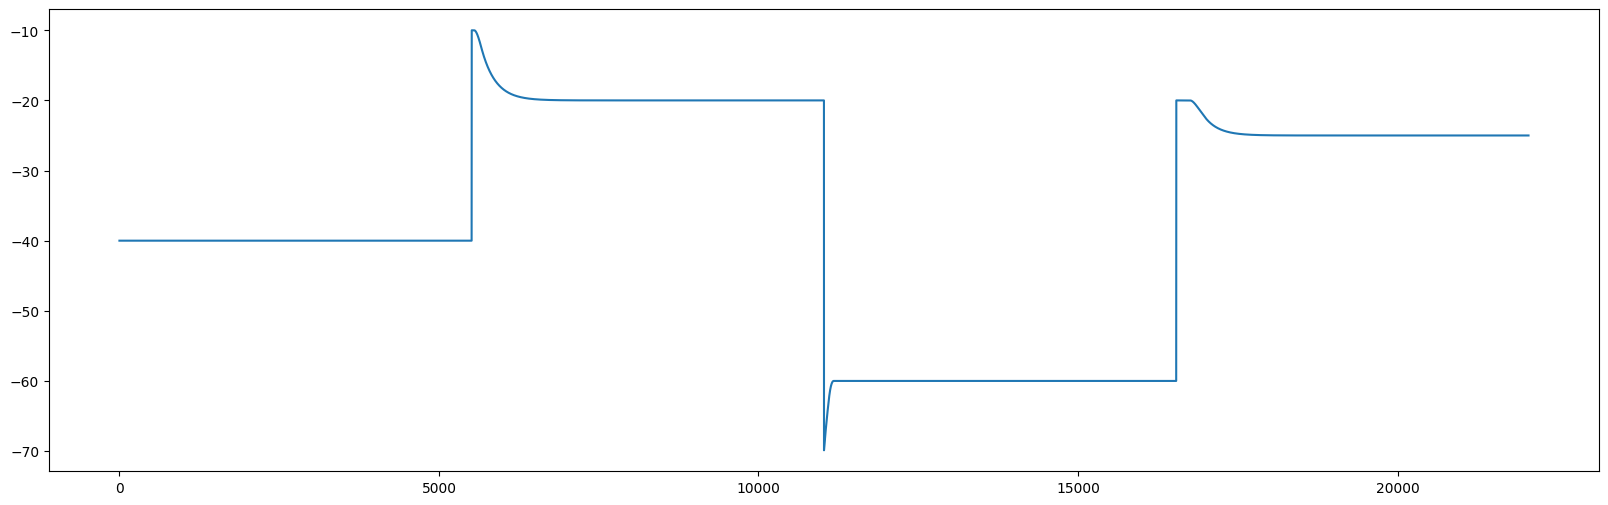

In [4]:
final_output = buffer + output
plt.figure(figsize=(20,6))
plt.plot(final_output)
plt.show()


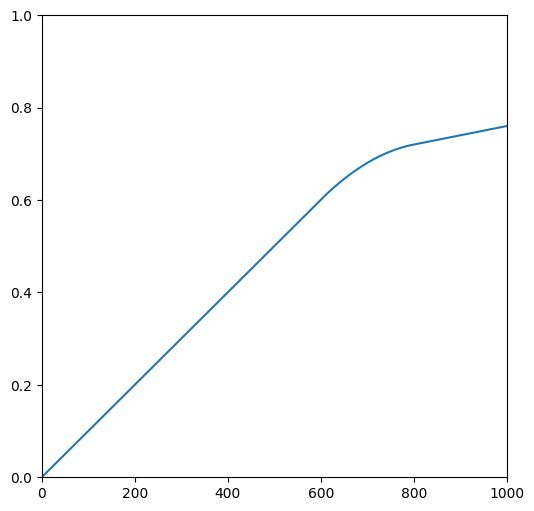

In [8]:
buf = np.linspace(0, 1, 1000)
buf_o = np.linspace(0, 1, 1000)

th = 0.7
up_r = 1
down_r = 5.0
w = 0.2

for i, x in enumerate(buf):
    if (2 * (x - th)) < -w:
        buf_o[i] = x
    elif (2 * abs(x - th)) <= w:
        buf_o[i] = x + ((1.0 / down_r - 1.0)*(x - th + w/2)**2) / (2.0 * w)
    else:
        buf_o[i] = th + (x - th) / down_r

for i, x in enumerate(buf_o):
    if (2 * (x - th)) < -w:
        buf_o[i] = th + (x - th) / up_r
    elif (2 * abs(x - th)) <= w:
        buf_o[i] = x - ((1.0 / up_r - 1.0)*(x - th - w/2)**2) / (2.0 * w)
    else:
        buf_o[i] = x

plt.figure(figsize=(6,6))
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.plot(buf_o)